In [3]:
import numpy as np
import pandas as pd
import cv2
import PIL
import pytesseract
import spacy

## Show a image

In [11]:
img = cv2.imread('../tvrtke/alder.jpg')
cv2.imshow('Tvrtka', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

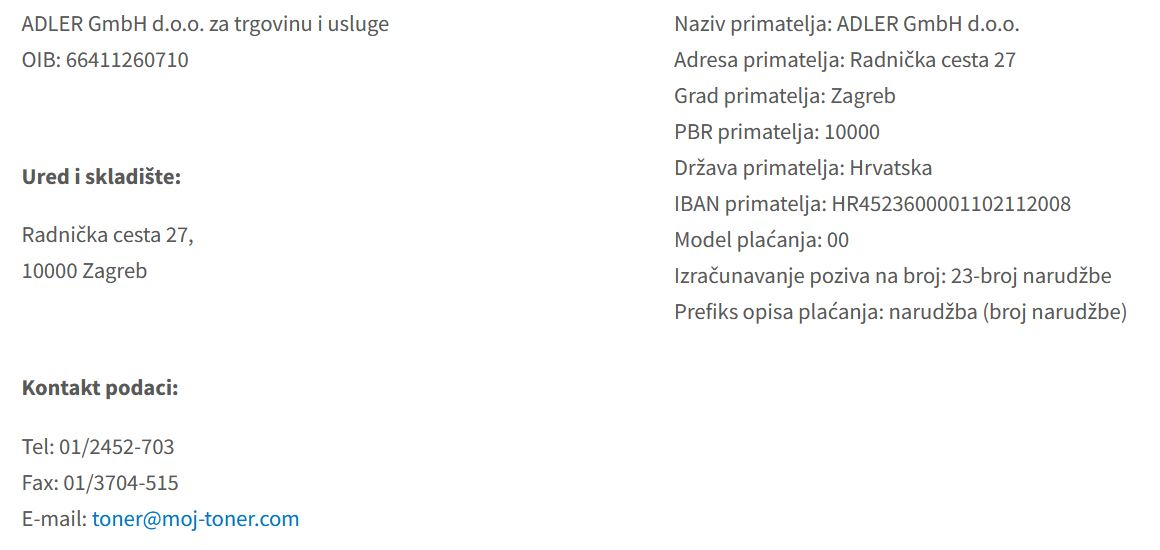

In [16]:
img_pil = PIL.Image.open('../tvrtke/alder.jpg')
img_pil

# Extract text from image

In [24]:
print(pytesseract.get_languages(config=''))

['eng', 'hrv', 'osd']


In [25]:
data = pytesseract.image_to_string(img, lang='hrv')

In [26]:
print(data)

ADLER GmbH d.o.o. za trgovinu i usluge
OIB: 66411260710

Uredi skladište:

Radnička cesta 27,
10000 Zagreb

Kontakt podaci:

Tel: 01/2452-703
Fax: 01/3704-515

E-mail: toner&moj-toner.com

Naziv primatelja: ADLER GmbH d.o.o.

Adresa primatelja: Radnička cesta 27

Grad primatelja: Zagreb

PBR primatelja: 10000

Država primatelja: Hrvatska

IBAN primatelja: HR4523600001102112008
Model plaćanja: 00

Izračunavanje poziva na broj: 23-broj narudžbe

Prefiks opisa plaćanja: narudžba (broj narudžbe)



In [29]:
data = pytesseract.image_to_data(img, lang='hrv')

In [30]:
print(data)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1160	550	-1	
2	1	1	0	0	0	22	15	367	52	-1	
3	1	1	1	0	0	22	15	367	52	-1	
4	1	1	1	1	0	22	15	367	21	-1	
5	1	1	1	1	1	22	16	60	15	95.943176	ADLER
5	1	1	1	1	2	89	15	57	16	95.279282	GmbH
5	1	1	1	1	3	153	15	50	16	82.580185	d.o.o.
5	1	1	1	1	4	210	20	18	11	96.891663	za
5	1	1	1	1	5	234	15	77	21	96.529205	trgovinu
5	1	1	1	1	6	319	15	3	16	96.530380	i
5	1	1	1	1	7	329	15	60	21	96.279739	usluge
4	1	1	1	2	0	22	52	166	15	-1	
5	1	1	1	2	1	22	52	38	15	80.400063	OIB:
5	1	1	1	2	2	67	52	121	15	92.673920	66411260710
2	1	2	0	0	0	23	167	157	17	-1	
3	1	2	1	0	0	23	167	157	17	-1	
4	1	2	1	1	0	23	167	157	17	-1	
5	1	2	1	1	1	23	168	46	16	89.131279	Uredi
5	1	2	1	1	2	86	167	94	17	96.457169	skladište:
2	1	3	0	0	0	23	225	170	58	-1	
3	1	3	1	0	0	23	225	170	58	-1	
4	1	3	1	1	0	23	225	170	21	-1	
5	1	3	1	1	1	23	225	84	17	96.833397	Radnička
5	1	3	1	1	2	114	228	46	14	96.313026	cesta
5	1	3	1	1	3	167	227	26	19	96.313026	27,
4	1	3	1	2	0	

In [31]:
data.split('\n')

['level\tpage_num\tblock_num\tpar_num\tline_num\tword_num\tleft\ttop\twidth\theight\tconf\ttext',
 '1\t1\t0\t0\t0\t0\t0\t0\t1160\t550\t-1\t',
 '2\t1\t1\t0\t0\t0\t22\t15\t367\t52\t-1\t',
 '3\t1\t1\t1\t0\t0\t22\t15\t367\t52\t-1\t',
 '4\t1\t1\t1\t1\t0\t22\t15\t367\t21\t-1\t',
 '5\t1\t1\t1\t1\t1\t22\t16\t60\t15\t95.943176\tADLER',
 '5\t1\t1\t1\t1\t2\t89\t15\t57\t16\t95.279282\tGmbH',
 '5\t1\t1\t1\t1\t3\t153\t15\t50\t16\t82.580185\td.o.o.',
 '5\t1\t1\t1\t1\t4\t210\t20\t18\t11\t96.891663\tza',
 '5\t1\t1\t1\t1\t5\t234\t15\t77\t21\t96.529205\ttrgovinu',
 '5\t1\t1\t1\t1\t6\t319\t15\t3\t16\t96.530380\ti',
 '5\t1\t1\t1\t1\t7\t329\t15\t60\t21\t96.279739\tusluge',
 '4\t1\t1\t1\t2\t0\t22\t52\t166\t15\t-1\t',
 '5\t1\t1\t1\t2\t1\t22\t52\t38\t15\t80.400063\tOIB:',
 '5\t1\t1\t1\t2\t2\t67\t52\t121\t15\t92.673920\t66411260710',
 '2\t1\t2\t0\t0\t0\t23\t167\t157\t17\t-1\t',
 '3\t1\t2\t1\t0\t0\t23\t167\t157\t17\t-1\t',
 '4\t1\t2\t1\t1\t0\t23\t167\t157\t17\t-1\t',
 '5\t1\t2\t1\t1\t1\t23\t168\t46\t16\t89.13127

# Table view

In [35]:
dataList = list(map(lambda x: x.split('\t'), data.split('\n')))
df = pd.DataFrame(dataList[1:], columns = dataList[0])
df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1160,550,-1,
1,2,1,1,0,0,0,22,15,367,52,-1,
2,3,1,1,1,0,0,22,15,367,52,-1,
3,4,1,1,1,1,0,22,15,367,21,-1,
4,5,1,1,1,1,1,22,16,60,15,95.943176,ADLER
...,...,...,...,...,...,...,...,...,...,...,...,...
98,5,1,8,1,1,3,800,302,83,22,96.909348,plaćanja:
99,5,1,8,1,1,4,890,302,87,17,96.872818,narudžba
100,5,1,8,1,1,5,984,303,42,21,96.365303,(broj
101,5,1,8,1,1,6,1033,302,93,21,97.001068,narudžbe)


# Data preparation for drawing levels

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      103 non-null    object
 1   page_num   102 non-null    object
 2   block_num  102 non-null    object
 3   par_num    102 non-null    object
 4   line_num   102 non-null    object
 5   word_num   102 non-null    object
 6   left       102 non-null    object
 7   top        102 non-null    object
 8   width      102 non-null    object
 9   height     102 non-null    object
 10  conf       102 non-null    object
 11  text       102 non-null    object
dtypes: object(12)
memory usage: 9.8+ KB


In [41]:
df.dropna(inplace=True) #drop the missing in rows
col_int= ['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf']
df[col_int] = df[col_int].astype(int)

In [42]:
df.dtypes

level         int32
page_num      int32
block_num     int32
par_num       int32
line_num      int32
word_num      int32
left          int32
top           int32
width         int32
height        int32
conf          int32
text         object
dtype: object

In [57]:
image = img.copy()
level = 'word'
for l, x, y, w, h, c, txt in df[['level', 'left', 'top', 'width', 'height', 'conf', 'text']].values:
    if level == 'page':
        if l == 1:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0,0,0), 2) #black
        else:
            continue
    elif level== 'block':
        if l == 2:
            cv2.rectangle(image, (x, y), (x+w, y+h), (255,0,0), 2) #blue
        else:
            continue
    elif level == 'para':
        if l == 3:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0,255,0), 2) #green
        else:
            continue
    elif level == 'line':
        if l == 4:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0,0,255), 2) #red
        else:
            continue
    elif level == 'word':
        if l == 5:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0,255,0), 2) #green
            cv2.putText(image, txt, (x, y), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,0), 2)
        else:
            continue
            
cv2.imshow('Bounding box', image)
cv2.waitKey(0)
cv2.destroyAllWindows()